In [1]:
import pandas as pd

In [ ]:
df_data = pd.read_csv('tracks.csv')

In [3]:
sorted_df = df_data.sort_values('popularity', ascending = False).head(100)
sorted_two_df = df_data.sort_values('popularity', ascending = True)
date = list(df_data.release_date)
for i in range(len(date)):
    date[i] = int(date[i][:4])

In [4]:
df_data['Year'] = date

In [5]:
df_pre90 = df_data[df_data.Year <= 1990]
df_post_90 = df_data[df_data.Year > 1990]

In [6]:
sorted_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4


In this tutorial series, we are going to be building a recommender system that uses the features of the songs, together with the lyrics to recommend songs to the listener. For part one, let's first visualize the data.

https://medium.com/@adriensieg/text-similarities-da019229c894

In [7]:
import plotly.express as px

## Visualization 1: Top 100 most popular songs vs. all of the rest  - Features

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
sorted_df_1 = sorted_df[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence' ]]
sorted_two_df = sorted_two_df[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence' ]]

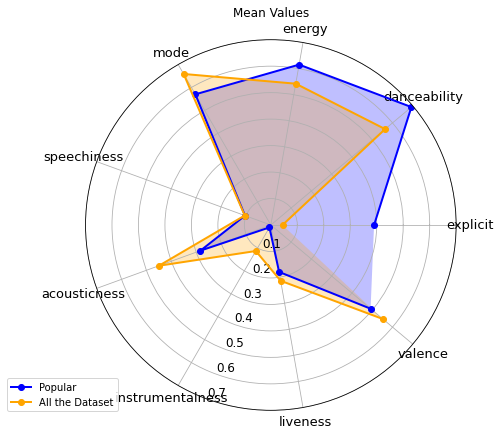

In [10]:
labels = list(sorted_df_1)[:]
stats = sorted_df_1.mean().tolist()
stats2 = sorted_two_df.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Popular", color= 'blue')
ax.fill(angles, stats, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "All the Dataset", color= 'orange')
ax.fill(angles, stats2, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [26]:
import networkx as nx

In [27]:
from scipy import spatial

In [28]:
list_songs = list(sorted_df.name)

In [29]:
spatial.distance.cosine(sorted_df_1.iloc[1], sorted_df_1.iloc[0])

0.06722006900223576

In [30]:
dict_edges = {}
for i in range(len(list_songs)):
    list_val = []
    for j in range(i):
        a_row = list(sorted_df_1.iloc[j])
        list_val.append([j, 1 - spatial.distance.cosine(sorted_df_1.iloc[i], a_row),list(sorted_df.iloc[j])[1] ])
    for j in range(i+1,len(list_songs)):    
        a_row = list(sorted_df_1.iloc[j])
        list_val.append([j, 1 - spatial.distance.cosine(sorted_df_1.iloc[i], a_row), list(sorted_df.iloc[j])[1]])
    dict_edges[i] = list_val 

In [31]:
dict_edges[0][1]

[2, 0.624587378766394, 'Astronaut In The Ocean']

In [32]:
new_dict = {}
for i in range(100):
    list_to_put = []
    for j in range(len(dict_edges[i])):
        if dict_edges[i][j][1] >= 0.95:
            list_to_put.append(dict_edges[i][j])      
    new_dict[i] = list_to_put

In [39]:
new_dict[6]

[[5, 0.9560293750509065, 'Leave The Door Open'],
 [9, 0.9617853833264152, 'Bandido'],
 [10,
  0.9543247062808949,
  'Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit'],
 [15, 0.9618532617779112, 'LA NOCHE DE ANOCHE'],
 [24, 0.975378085973775, 'Watermelon Sugar'],
 [34, 0.9825310864278127, 'Your Love (9PM)'],
 [36, 0.9698599391328867, "We're Good"],
 [42, 0.9966740678817692, 'Sweater Weather'],
 [45, 0.9615933691766524, 'Anyone'],
 [47, 0.9637384203440083, 'Beautiful Mistakes (feat. Megan Thee Stallion)'],
 [48, 0.9514504337674509, 'Baila Conmigo (with Rauw Alejandro)'],
 [58, 0.9786201789244626, 'Life Goes On'],
 [62, 0.9790768610231424, 'Circles'],
 [75, 0.9626145705580303, 'Film out'],
 [77, 0.9863620286062014, 'Adore You'],
 [85, 0.9745729782766279, 'Do I Wanna Know?'],
 [88, 0.9661079822199794, 'Holy (feat. Chance The Rapper)']]

In [34]:
G = nx.Graph()
for i in range(100):
    for j in range(len(new_dict[i])):
        G.add_node(i,label = i)
        G.add_edge(i, new_dict[i][j][0], weight=new_dict[i][j][1], title = new_dict[i][j][2])

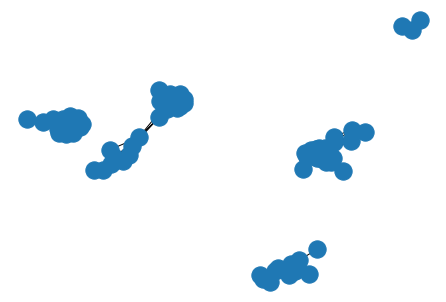

In [35]:
import matplotlib.pyplot as plt

nx.draw(G)


In [36]:
max_deg = 0
node = 0
for n in G.nodes():
    if G.degree[n] > max_deg:
        max_deg = G.degree[n]
        node = n
print(max_deg, node)   

23 55


In [40]:
sum_d = 0
for n in G.nodes():
    sum_d += G.degree[n]
sum_d/len(G.nodes())

12.494845360824742

In [41]:
len(G.nodes())

97

In [42]:
sorted_df.iloc[55]

id                      20McUFi8KCIVdNDLrkTDuZ
name                                Goosebumps
popularity                                  89
duration_ms                             163208
explicit                                     1
artists                               ['HVME']
id_artists          ['2o08sCWF5yyo2G4DCiT7T9']
release_date                        2020-06-12
danceability                            0.7670
energy                                  0.6590
key                                          1
loudness                               -7.4290
mode                                         1
speechiness                             0.0444
acousticness                            0.3250
instrumentalness                        0.0000
liveness                                0.1300
valence                                 0.4390
tempo                                 124.9460
time_signature                               4
Name: 92871, dtype: object

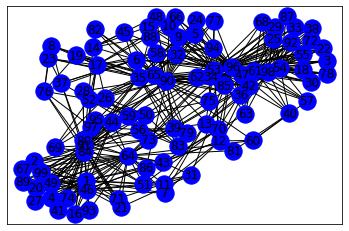

In [187]:
selected_nodes = [n for n in range(len(G.nodes(data=True))) if G.nodes[n]['label'] == 9]  
#H = G.subgraph(selected_nodes)
#nx.draw(H,with_labels=True,node_size=3000)
othersubgraph = G.subgraph(range(1,G.order()))
nx.draw_networkx(othersubgraph, pos=pos, node_color = 'b')

In [192]:
ed = G.edges(3, data = True)
H = nx.Graph()
for i in ed:
    H.add_edge(3, i[1], weight = i[2]['weight'], title = i[2]['title'] )

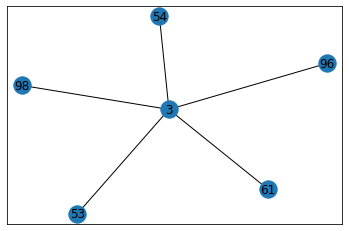

In [196]:
nx.draw_networkx(H, with_labels = True)

In [197]:
for i in ed:
    print(i[2]['title'])

lovely (with Khalid)
Save Your Tears
Arcade
Train Wreck
death bed (coffee for your head)


## Visualization 2: Scatterplots of Features

### Explicitness

KeyError: 'From_All'

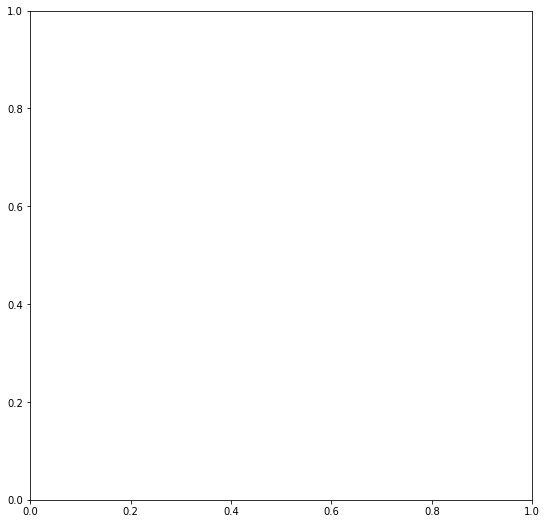

In [100]:
import seaborn as sns
#sns.boxplot(x = 'From_All', y = 'valence', data = sorted_df_1)

fig, ax = plt.subplots(figsize=(9,  9))
sorted_df_1.boxplot(['danceability', 'energy', 'liveness', 'valence'], 'From_All', ax)

In [101]:
sorted_df_1.head()

,explicit,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence
93802,1,0.677,0.696,1,0.1190,0.3210,0.000000,0.420,0.464
93803,1,0.585,0.436,1,0.0601,0.7210,0.000013,0.105,0.132
93804,0,0.778,0.695,0,0.0913,0.1750,0.000000,0.150,0.472
92810,1,0.680,0.826,1,0.0309,0.0212,0.000012,0.543,0.644
92811,0,0.653,0.524,0,0.0502,0.1120,0.000000,0.203,0.553


### Energy vs. Danceability

In [102]:
import random
from random import randint

In [103]:

value = randint(0,10)
already_picked = []
for i in range(100):
    value = randint(100,586672)
    already_picked.append(value)

df = pd.DataFrame(columns=['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'])
for i in range(len(already_picked)):  
    df = df.append({'explicit':sorted_two_df.iloc[i, 0], 'danceability':sorted_two_df.iloc[i, 1], 'energy':sorted_two_df.iloc[i, 2], 'mode':sorted_two_df.iloc[i, 3], 'speechiness':sorted_two_df.iloc[i, 4], 'acousticness':sorted_two_df.iloc[i, 5], 'instrumentalness':sorted_two_df.iloc[i, 6], 'liveness':sorted_two_df.iloc[i, 7], 'valence':sorted_two_df.iloc[i, 8] }, ignore_index=True)
df['From_All'] = [1 for i in range(len(df.index))]   
    

In [104]:
sorted_df_1['From_All'] =  [0 for i in range(len(sorted_df_1.index))]   

<ipython-input-104-d035d21849b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_df_1['From_All'] =  [0 for i in range(len(sorted_df_1.index))]


In [105]:
sorted_df_1 = sorted_df_1.append(df)

In [106]:
sorted_df_1.head()

,explicit,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,From_All
93802,1.0,0.677,0.696,1.0,0.1190,0.3210,0.000000,0.420,0.464,0
93803,1.0,0.585,0.436,1.0,0.0601,0.7210,0.000013,0.105,0.132,0
93804,0.0,0.778,0.695,0.0,0.0913,0.1750,0.000000,0.150,0.472,0
92810,1.0,0.680,0.826,1.0,0.0309,0.0212,0.000012,0.543,0.644,0
92811,0.0,0.653,0.524,0.0,0.0502,0.1120,0.000000,0.203,0.553,0


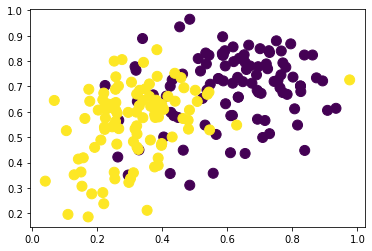

In [107]:
plt.scatter(sorted_df_1.energy, sorted_df_1.danceability, s=100, c=sorted_df_1.From_All, label='From_All')

In [109]:
my_rho = np.corrcoef(sorted_df_1.energy[sorted_df_1.From_All == 1], sorted_df_1[sorted_df_1.From_All == 1].danceability)
my_rho_2 = np.corrcoef(sorted_df_1.energy[sorted_df_1.From_All == 0], sorted_df_1[sorted_df_1.From_All == 0].danceability)
print(my_rho,my_rho_2)

[[1.         0.35156523]
 [0.35156523 1.        ]] [[1.         0.20520467]
 [0.20520467 1.        ]]


###  Valence and Liveliness

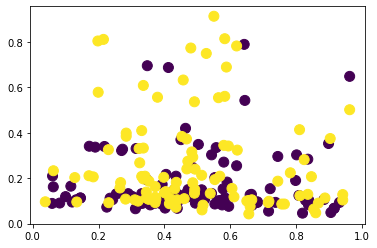

In [108]:
plt.scatter(sorted_df_1.valence, sorted_df_1.liveness, s=100, c=sorted_df_1.From_All)

In [112]:
my_rho = np.corrcoef(sorted_df_1.valence[sorted_df_1.From_All == 1], sorted_df_1[sorted_df_1.From_All == 1].liveness)
my_rho_2 = np.corrcoef(sorted_df_1.valence[sorted_df_1.From_All == 0], sorted_df_1[sorted_df_1.From_All == 0].liveness)
my_rho

array([[ 1.        , -0.09403765],
       [-0.09403765,  1.        ]])

In [113]:
my_rho_2

array([[1.        , 0.02555036],
       [0.02555036, 1.        ]])

## Visualization 3: Comparing the Eras

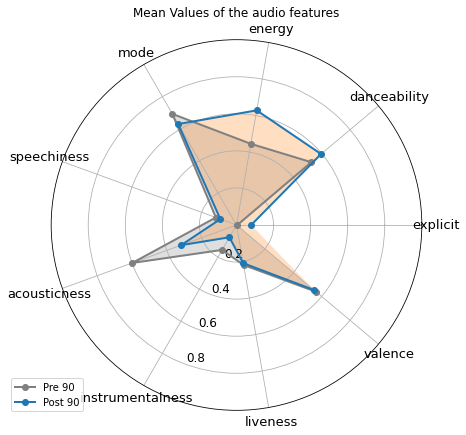

In [15]:
df_pre90 = df_pre90[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence' ]]
df_post_90 = df_post_90[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence' ]]

labels = list(df_pre90)[:]
stats = df_pre90.mean().tolist()
stats2 = df_post_90.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
#stats = np.concatenate((stats,[stats[0]]))
#stats2 = np.concatenate((stats2,[stats2[0]])) 
#angles = np.concatenate((angles,[angles[0]]))

#Size of the figure
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Pre 90", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "Post 90")
ax.fill(angles, stats2, alpha=0.25)
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))


## Visualization 4: Artists

### Most Popular Artists 

In [17]:
from collections import Counter
import re

In [18]:
sorted_df.artists.values[0] = sorted_df.artists.values[0].replace('[', '')
sorted_df.artists.values[0] = sorted_df.artists.values[0].replace(']', '')
sorted_df.artists.values[0]

r1 = re.compile(r"\w{1,20}.\w{1,20}", re.MULTILINE | re.DOTALL)
r = r1.findall(sorted_df.artists.values[0])

In [19]:
type(r)

list

In [20]:
list_top_100 = list(sorted_df.artists.values)

In [21]:
all_artists = []
for i in range(len(list_top_100)):
    r1 = re.compile(r"\w{1,20}.\w{1,20}", re.MULTILINE | re.DOTALL)
    r = r1.findall(list_top_100[i])
    if len(r) > 0:
        all_artists.append(r[0])

In [22]:
c = Counter(all_artists)
list(c)[:10]

['Justin Bieber',
 'Olivia Rodrigo',
 'Masked Wolf',
 'The Weeknd',
 'Kali Uchis',
 'Bruno Mars',
 'Tiësto',
 'Giveon',
 'Myke Towers',
 'Riton']

In [23]:
list(c.values())

[5,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 1,
 2,
 1,
 4,
 4,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1]

In [27]:
df_artists = pd.DataFrame(data = {'Name':list(c)[:20], 'Count':list(c.values())[:20]})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Justin Bieber'),
  Text(1, 0, 'Olivia Rodrigo'),
  Text(2, 0, 'Masked Wolf'),
  Text(3, 0, 'The Weeknd'),
  Text(4, 0, 'Kali Uchis'),
  Text(5, 0, 'Bruno Mars'),
  Text(6, 0, 'Tiësto'),
  Text(7, 0, 'Giveon'),
  Text(8, 0, 'Myke Towers'),
  Text(9, 0, 'Riton'),
  Text(10, 0, 'Los Legendarios'),
  Text(11, 0, 'Doja Cat'),
  Text(12, 0, 'The Kid'),
  Text(13, 0, 'SZA'),
  Text(14, 0, 'Bad Bunny'),
  Text(15, 0, 'Nathan Evans'),
  Text(16, 0, 'Ariana Grande'),
  Text(17, 0, 'Boza'),
  Text(18, 0, 'MEDUZA'),
  Text(19, 0, 'Cardi B')])

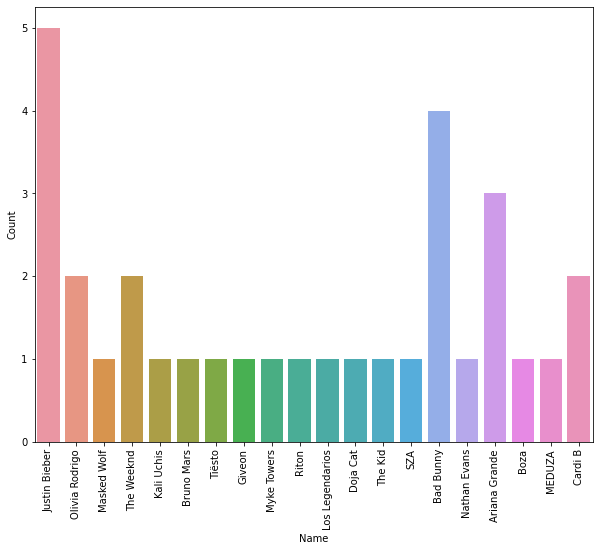

In [33]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'Name', y = 'Count', data = df_artists)
plt.xticks(rotation=90)

## Scraping the Lyrics Data  

In [1]:
# LyricsGenius API

In [34]:
!pip install git+https://github.com/johnwmillr/LyricsGenius.git

  Cloning https://github.com/johnwmillr/LyricsGenius.git to /tmp/pip-req-build-_hhdi32l
  Created wheel for lyricsgenius: filename=lyricsgenius-3.0.1-py3-none-any.whl size=44670 sha256=19b4d936eee9ff47e73326941ccb2e2f1a5beec3f9285fde5048a5f14727a08b
  Stored in directory: /tmp/pip-ephem-wheel-cache-4v0_h7ov/wheels/64/c0/2c/8e83de1c83814299822723e7471f38a2dfbd750de606c7ccbd
Successfully built lyricsgenius


In [36]:
import lyricsgenius
LyricsGenius = lyricsgenius.Genius(client_access_token)

In [43]:
song = LyricsGenius.search_song("Missy Elliott", "Work It")

Searching for "Missy Elliott" by Work It...
Done.


In [13]:
song.lyrics

"[Intro]\nDJ, please pick up your phone, I'm on the request line\nThis is a Missy Elliott one-time exclusive, come on\n\n[Chorus]\nIs it worth it? Let me work it\nI put my thing down, flip it and reverse it\nTi esrever dna ti pilf, nwod gniht ym tup\nTi esrever dna ti pilf, nwod gniht ym tup\nIf you got a big—, let me search ya\nAnd find out how hard I gotta work ya\nTi esrever dna ti pilf, nwod gniht ym tup\nTi esrever dna ti pilf, nwod gniht ym tup\nC'mon\n\n[Verse 1]\nI'd like to get to know ya so I could show ya\nPut the pussy on ya like I told ya\nGive me all your numbers so I can phone ya\nYour girl acting stank, then call me over\nNot on the bed, lay me on your sofa\nCall before you come, I need to shave my chocha\nYou do or you don't or you will or won't ya?\nGo downtown and eat it like a vulture\nSee my hips and my tips, don't ya?\nSee my ass and my lips, don't ya?\nLost a few pounds and my waist for ya\nThis the kinda beat that go ra-ta-ta\nRa-ta-ta-ta-ta-ta-ta-ta-ta-ta\nSex 

In [14]:
#let's get the lyrics for the songs in our dataset

In [37]:
#building a list of lists, with each element having Artist_Name and Song_Name:
list_artists_songs = []
lyrics_each = []

In [38]:
songs_list =  list(df_data.name)
artists_list = list(df_data.artists)

In [39]:
print(len(songs_list), len(artists_list))

586672 586672


In [40]:
for i in range(len(songs_list)):
    r1 = re.compile(r"\w{1,20}.\w{1,20}", re.MULTILINE | re.DOTALL)
    r = r1.findall(artists_list[i])
    if len(r) > 0:
        for j in r:
            list_artists_songs.append([songs_list[i], j])

In [41]:
print(len(list_artists_songs))

915191


In [44]:
already_chosen = list(pd.read_csv("ChosenAlready").Numbers)

In [45]:
#make these randomly selected
for i in range(200):
    value = randint(0,915191)
    if value not in already_chosen:
        already_chosen.append(value)
        song = LyricsGenius.search_song(list_artists_songs[value][1], list_artists_songs[value][0])
        if song != None:
            lyrics_each.append(song.lyrics)

Searching for "Drake" by Where Ya At (feat. Drake)...
Done.
Searching for "Roza Eskenazi" by Ntougkiax Manes...
No results found for: 'Roza Eskenazi Ntougkiax Manes'
Searching for "Los Tres" by El Aval...
Done.
Searching for "Giuseppe Verdi" by Aida (1997 Digital Remaster): La fatal pietra sovra me si chiuse...
No results found for: 'Giuseppe Verdi Aida (1997 Digital Remaster): La fatal pietra sovra me si chiuse'
Searching for "Intocable" by Prometí...
Done.
Searching for "Josh Groban" by You Are Loved (Don't Give Up)...
Done.
Searching for "Richard Wagner" by Die Walküre, WWV 86B / Act 3: "Der Augen leuchtendes Paar"...
No results found for: 'Richard Wagner Die Walküre, WWV 86B / Act 3: "Der Augen leuchtendes Paar"'
Searching for "Sullivan" by A Friend of Mine...
Done.
Searching for "Boogie Down" by 9mm Goes Bang...
Done.
Searching for "Miles Davis" by S’Posin’...
Done.
Searching for "Sou" by チューリングラブ...
Done.
Searching for "Christian" by Es ist geil ein Arschloch zu sein - Radio Vers

In [62]:
df_old_lyrics_l = list(pd.read_csv('283_SONGS').Text)
new_lyrics = df_old_lyrics_l + lyrics_each

In [63]:
print(len(new_lyrics))

406


In [64]:
df_already = pd.DataFrame(data = {'Numbers': already_chosen})
df_already.to_csv('ChosenAlready', index = False)

In [65]:
df_lyrics = pd.DataFrame(data = {'Text': df_old_lyrics_l})
df_lyrics.to_csv('400 Songs', index = True)

## Visualization 5: Lyrics Data: Unigrams and Bigrams

In [43]:
df_read_lyrics = pd.read_csv('400 Songs')

In [44]:
df_read_lyrics.head()

,Unnamed: 0,Text
0,0,"[Verse]\nI feel so impure\nEvery day, less sur..."
1,1,THE AMERICAN ACADEMY of Emergency Medicine con...
2,2,"[Intro: Young M.A]\nAw man, the squad is here\..."
3,3,All these songs are about (or heavily referenc...
4,4,"[Paroles de ""Respect P. Diddy""]\n\n[Intro : Go..."


In [45]:
import sys
!{sys.executable} -m pip install textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)


In [46]:
from textblob import TextBlob

In [47]:
w = TextBlob(str(df_read_lyrics.iloc[0].Text))

In [48]:
w.sentiment.polarity

0.1047619047619048

In [73]:
list_polarities = []
for i in range(len(df_read_lyrics.index)):
    w = TextBlob(str(df_read_lyrics.iloc[i].Text))
    list_polarities.append(w.sentiment.polarity)
    print(len(w))

432
78108
37507
33982
2086
62222
5453
2424
38464
2060
1789
119685
37507
18408
3033
44127
27068
386
1822
608
1541
791
534726
44127
5701
16351
534726
7344
634
682
44127
119685
1763
1557
1984
805
378
622
1105
2059
1936
17657
17328
673
796
1514
1194
35525
3209
20987
556
1088
244999
992
1875
2473
3741
616
1325
357
1386
3481
552
760
227617
34912
1723
30114
1629
30118
950
955
1267
226
79307
1118
1660
2809
2591
480
3914
1728
866
1272
1347
592
2281
1059
1875
3261
1647
342
2310
1175
1472
12205
1243
129
1364
1365
2627
5104
1475
1460
3537
52336
2692
725
3363
2999
1
1900
2971
4104
1087
1311
5802
267
35683
461
5180
466
2761
222717
830
303
10350
1327
978
1695
976
1228
934
449
1105
2662
831
1286
1896
37587
12166
1211
1262
2735
1483
7742
2106
1699
227617
949
1201
1035
144257
1056
3172
1211
154490
492
684
213
560
2190
1125
2061
3125
1008
41006
4441
1553
24624
607
2666
2073
1118
10348
2568
2480
35437
2343
733
1537
2504
5045
10262
32527
2882
903
4284
564
1530
4526
162424
1830
805
227617
3227
1248
43242
71

In [52]:
import numpy as np

In [53]:
pol = pd.DataFrame(data = {'Polarity':list_polarities})

In [54]:
np.mean(list_polarities)

0.06915237868895947

In [55]:
pol.head()

,Polarity
0,0.104762
1,0.096368
2,-0.062156
3,0.049851
4,0.066667


<AxesSubplot:>

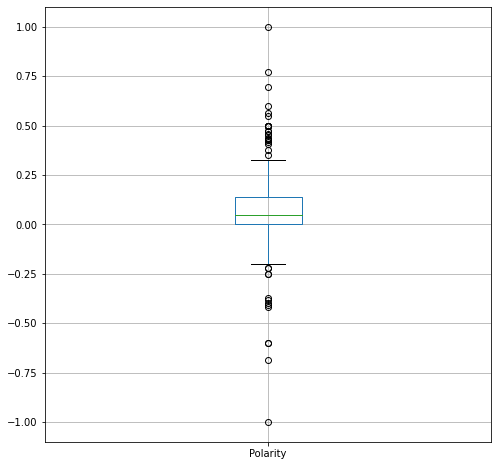

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.boxplot(x = 'From_All', y = 'valence', data = sorted_df_1)

fig, ax = plt.subplots(figsize=(8,  8))
pol.boxplot('Polarity')

In [63]:
w = TextBlob(str(df_read_lyrics.iloc[7].Text))
w.tags

[('[', 'JJ'),
 ('Intro', 'NNP'),
 ('Sample', 'NNP'),
 ('de', 'IN'),
 ('Bayrou', 'NNP'),
 (']', 'NNP'),
 ('Vous', 'NNP'),
 ('connaissez', 'NN'),
 ('la', 'NN'),
 ('vieille', 'FW'),
 ('phrase', 'NN'),
 ('de', 'FW'),
 ('Victor', 'NNP'),
 ('Hugo', 'NNP'),
 ('qui', 'VBD'),
 ('disait', 'NN'),
 ('euh', 'NN'),
 ('Quand', 'NNP'),
 ("j'ouvre", 'NN'),
 ('une', 'JJ'),
 ('école', 'NNP'),
 ('je', 'NN'),
 ('ferme', 'NN'),
 ('une', 'JJ'),
 ('prison', 'NN'),
 ('Euh', 'NN'),
 ('alors', 'NNS'),
 ('peut-être', 'JJ'),
 ('c', 'NNS'),
 ('’', 'VBP'),
 ('est', 'JJS'),
 ('une', 'JJ'),
 ('phrase', 'NN'),
 ('du', 'VBD'),
 ('19e', 'CD'),
 ('siècle', 'NN'),
 ('mais', 'NN'),
 ("c'est", 'NN'),
 ('une', 'JJ'),
 ('phrase', 'NN'),
 ('d', 'NN'),
 ('’', 'NNP'),
 ('aujourd', 'VBZ'),
 ('’', 'NNP'),
 ('hui', 'NN'),
 ('Si', 'NNP'),
 ('vous', 'JJ'),
 ('regardez', 'NN'),
 ('les', 'NNS'),
 ('jeunes', 'NNS'),
 ('délinquants', 'NNS'),
 ('alors', 'NNS'),
 ('vous', 'VBP'),
 ('vous', 'JJ'),
 ('apercevrez', 'NN'),
 ('que', 'NN'),
 ('9'

In [74]:
n_perc = []
plural_perc = []
reg_ad_perc = []
comp_ad_perc = []
super_ad_perc = []
verb_perc = []

for i in range(len(df_read_lyrics.index)):
    nouns_count = 0
    plural = 0
    reg_adv = 0
    comp_adv = 0 
    super_adv = 0
    verb = 0
    w = TextBlob(str(df_read_lyrics.iloc[i].Text))
    if len(w.tags) <= 10000:
        for j in range(len(w.tags)):
            if w.tags[j][1] == 'NN':
                nouns_count += 1
            if w.tags[j][1] == 'NNS':
                plural += 1
            if w.tags[j][1] == 'RB':
                reg_adv += 1
            if w.tags[j][1] == 'RBS':
                super_adv += 1
            if w.tags[j][1] == 'RBR':
                comp_adv += 1 
            if w.tags[j][1] == 'VB':
                verb += 1  
        print(i, 'Processed')        
        n_perc.append(nouns_count/len(w.tags)) 
        plural_perc.append(plural/len(w.tags)) 
        reg_ad_perc.append(reg_adv/len(w.tags)) 
        comp_ad_perc.append(comp_adv/len(w.tags)) 
        super_ad_perc.append(super_adv/len(w.tags)) 
        verb_perc.append(verb/len(w.tags)) 

0 Processed
2 Processed
3 Processed
4 Processed
6 Processed
7 Processed
8 Processed
9 Processed
10 Processed
12 Processed
13 Processed
14 Processed
15 Processed
16 Processed
17 Processed
18 Processed
19 Processed
20 Processed
21 Processed
23 Processed
24 Processed
25 Processed
27 Processed
28 Processed
29 Processed
30 Processed
32 Processed
33 Processed
34 Processed
35 Processed
36 Processed
37 Processed
38 Processed
39 Processed
40 Processed
41 Processed
42 Processed
43 Processed
44 Processed
45 Processed
46 Processed
47 Processed
48 Processed
49 Processed
50 Processed
51 Processed
53 Processed
54 Processed
55 Processed
56 Processed
57 Processed
58 Processed
59 Processed
60 Processed
61 Processed
62 Processed
63 Processed
65 Processed
66 Processed
67 Processed
68 Processed
69 Processed
70 Processed
71 Processed
72 Processed
73 Processed
75 Processed
76 Processed
77 Processed
78 Processed
79 Processed
80 Processed
81 Processed
82 Processed
83 Processed
84 Processed
85 Processed
86 Proc

In [75]:
len(n_perc)

259

In [76]:
poly = pd.DataFrame(data = {'Noun_singular':n_perc})

In [77]:
poly['Noun_singular'] = n_perc
poly['Noun_plural'] = plural_perc
poly['Regular_ad'] = reg_ad_perc
poly['Comp_ad'] = comp_ad_perc
poly['Super_ad'] = super_ad_perc
poly['Verb'] = verb_perc

In [78]:
poly.to_csv('Metrics', index = True)

In [2]:
poly = pd.read_csv('Metrics')

In [3]:
poly.head()

,Unnamed: 0,Noun_singular,Noun_plural,Regular_ad,Comp_ad,Super_ad,Verb
0,0,0.215054,0.021505,0.032258,0.010753,0.000000,0.043011
1,1,0.138523,0.031842,0.056788,0.000627,0.000000,0.045380
2,2,0.103575,0.027864,0.006049,0.000183,0.000183,0.006233
3,3,0.369898,0.091837,0.015306,0.000000,0.000000,0.002551
4,4,0.157944,0.009346,0.036449,0.000935,0.000000,0.039252


<AxesSubplot:>

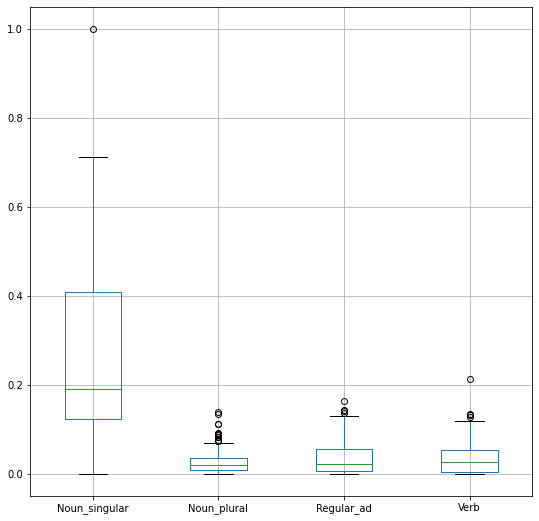

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,  9))
poly.boxplot(['Noun_singular', 'Noun_plural', 'Regular_ad', 'Verb'])

<AxesSubplot:>

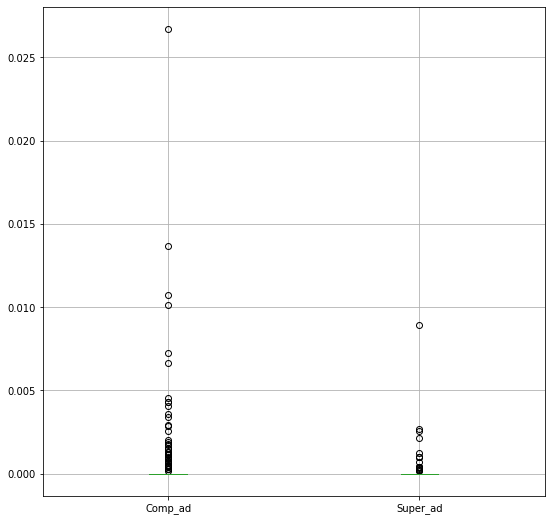

In [11]:
fig, ax = plt.subplots(figsize=(9,  9))
poly.boxplot(['Comp_ad', 'Super_ad'])